In [1]:
import cv2
import os
import warnings
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage import io
from scipy.signal import convolve2d 

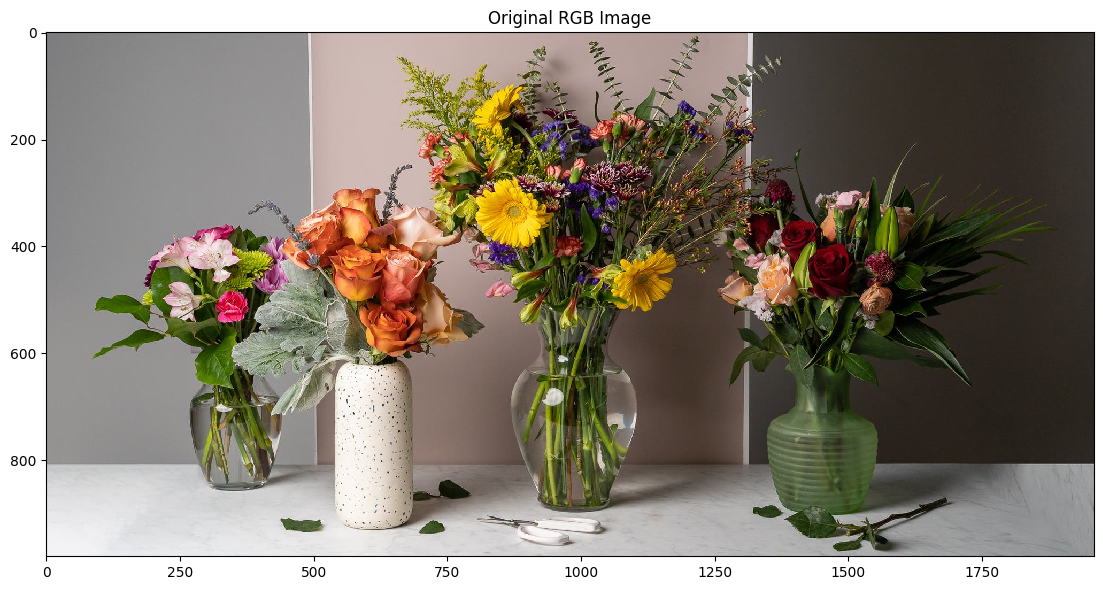

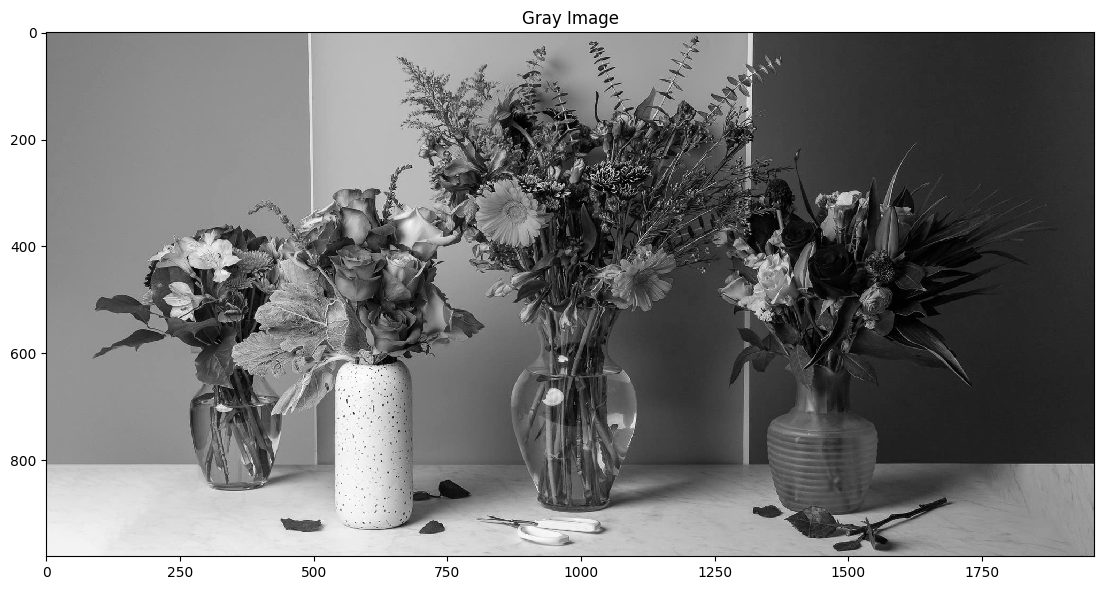

In [2]:
# Show the RGB photo
RGB = io.imread('Original.jpg')
plt.figure(figsize=(15,6)) 
plt.title("Original RGB Image")
io.imshow(RGB)

# Show the gray photo
Gray = cv2.cvtColor(RGB,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6)) 
plt.title("Gray Image")
io.imshow(Gray, cmap = 'gray')

In [3]:
def Kuwahara(original, winsize):
    image = original.astype(np.float64)
        
    # Building subwindows
    tmpAvgKerRow = np.hstack((np.ones((1,(winsize-1)//2+1)),np.zeros((1,(winsize-1)//2))))
    tmpPadder = np.zeros((1,winsize))
    tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1,1))
    tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2,1))))
    tmpavgker = tmpavgker/np.sum(tmpavgker)
    
    # We should build a vector of convolution kernels for computing average and variance
    avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
    avgker[0] = tmpavgker # North-west (a)
    avgker[1] = np.fliplr(tmpavgker) # North-east (b)
    avgker[2] = np.flipud(tmpavgker) # South-west (c)
    avgker[3] = np.fliplr(avgker[2]) # South-east (d)
    
    # Create a pixel-by-pixel square of the image
    squaredImg = image**2 
    
    # Preallocate these arrays to make it faster
    avgs = np.zeros([4, image.shape[0],image.shape[1]])
    stddevs = avgs.copy()
    
    # Calculation of averages and variances on subwindows
    for k in range(4):
        # Mean on subwindow
        avgs[k] = convolve2d(image, avgker[k],mode='same')
        # Mean of squares on subwindow
        stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
        # Variance on subwindow
        stddevs[k] = stddevs[k]-avgs[k]**2
        
    # Choose the minimum variance
    indices = np.argmin(stddevs,0) # Returns index of subwindow with smallest variance
    
    # Building the filtered image
    filtered = np.zeros(original.shape)
    for row in range(original.shape[0]):
        for col in range(original.shape[1]):
            filtered[row,col] = avgs[indices[row,col], row,col]
            
    return filtered.astype(np.uint8)

In [4]:
# Kuwahara filter 9*9
area = 9
Kuwahara_image = Kuwahara(Gray,area)

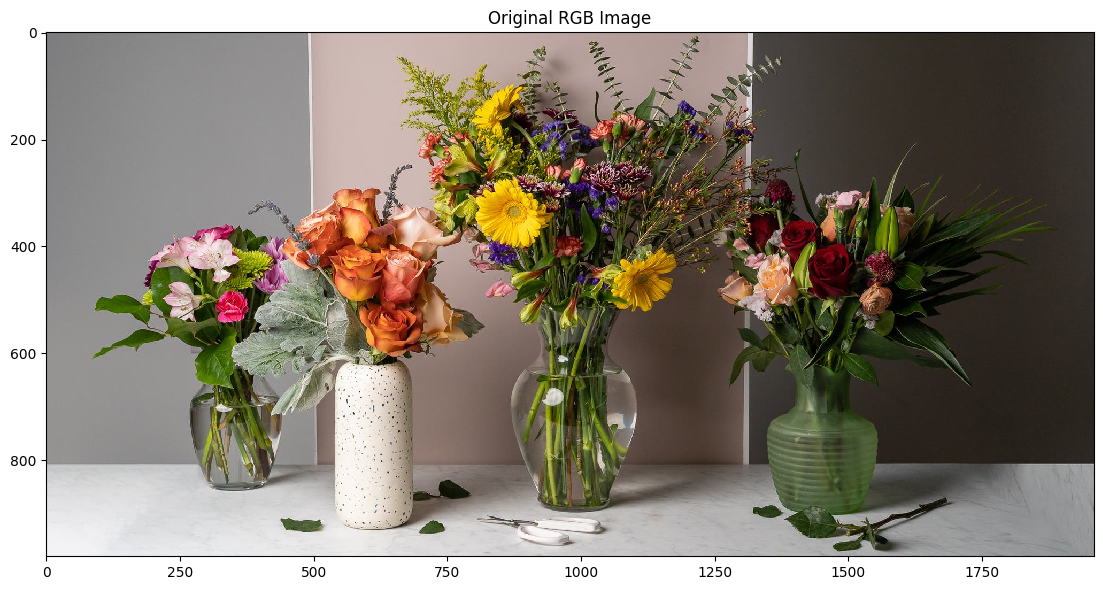

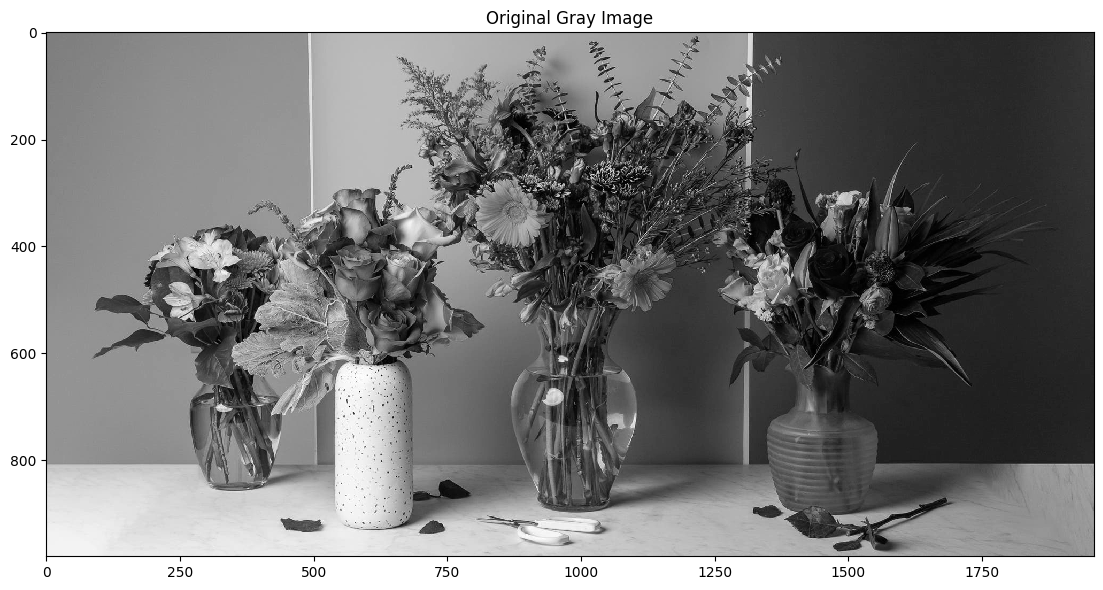

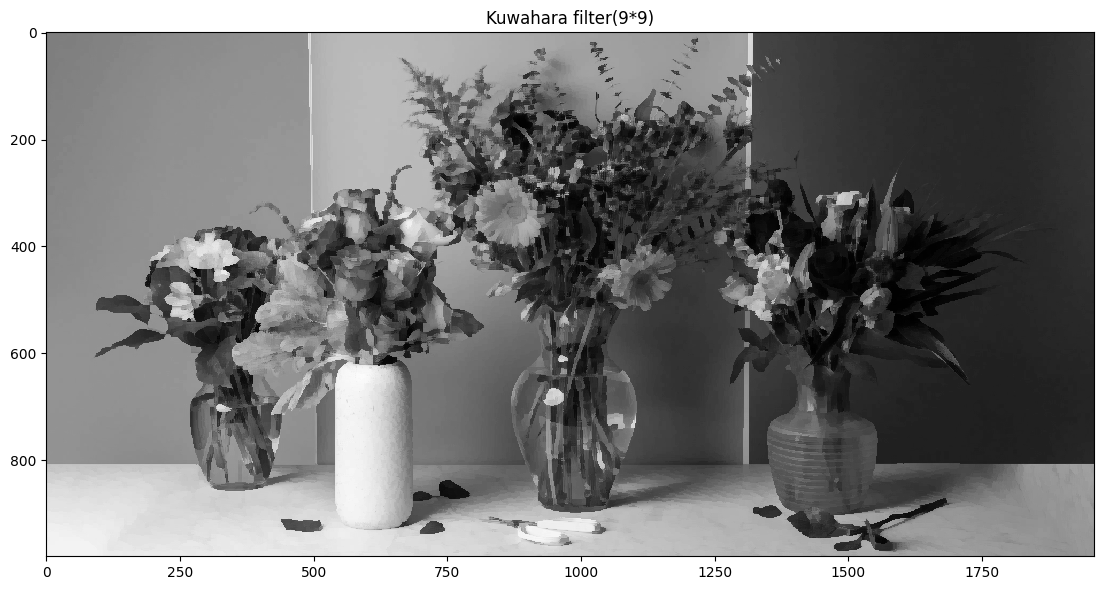

In [6]:
# Show images
plt.figure(figsize=(15,6)) 
plt.title("Original RGB Image")
io.imshow(RGB/255)

plt.figure(figsize=(15,6)) 
plt.title("Original Gray Image")
io.imshow(Gray/255)

plt.figure(figsize=(15,6)) 
plt.title("Kuwahara filter(9*9)")
io.imshow(Kuwahara_image/255)
plt.show()

In [7]:
plt.imsave('Kuwahara_filtered_image.png', Kuwahara_image, cmap=plt.get_cmap('gray'))